<a href="https://colab.research.google.com/github/jsale017/Insurance_Claims_ML/blob/main/Insurance_Claims_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Insurance Claims with Machine Learning
### By: J. Dev Rao, Jose Salerno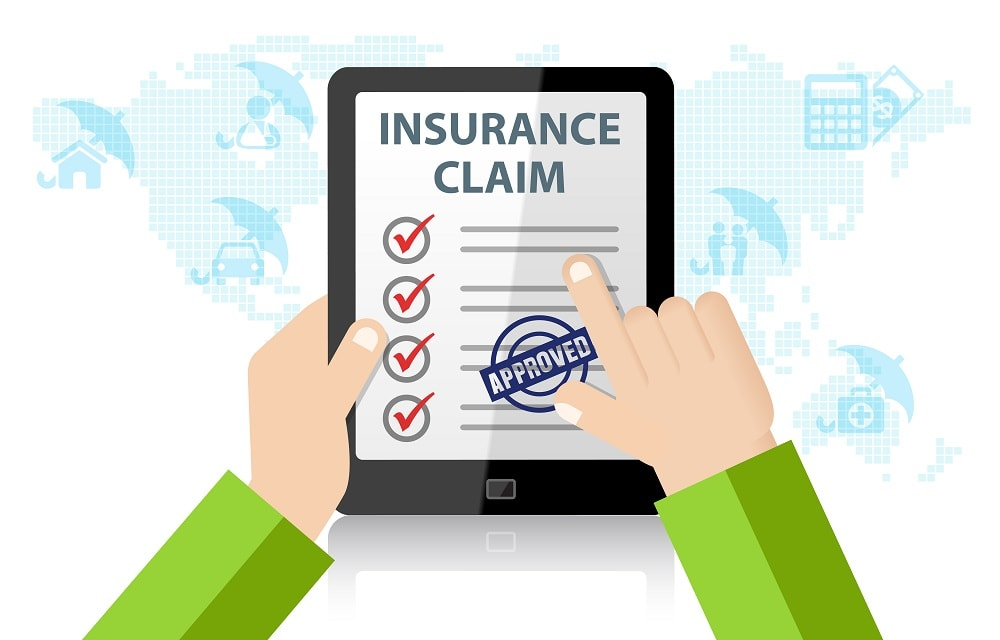


# Table of Contents:

### 1. Executive Summary
### 2. Motivation
### 3. Data Source and Data Dictionary
### 4. Introduction
### 5. Exploratory Phase
### 6. Classification Models


> Hyperparameter Tunning


### 7. Limitations
### 8. Conclusion
### 9. References

# 1. Executive Summary
- Our teams project aims to help insurance companies improve their accuracy in categorizing customers as likely to submit an insurance claim. Insurance fraud has been a growing concern, and according to Conroy Simberg, the cost of insurance fraud in the US reached $308 billion in 2023. This staggering amount highlights the need for more effective strategies to mitigate insurance fraud and minimize the losses incurred by insurance companies.

    To address this issue, our team utilized our analytical skills to develop categorical models that can accurately classify insurance claims. Our models utilize a range of data points, including demographic information, past claim history, and other relevant data, to provide a more accurate prediction of whether a customer is likely to submit a claim. By doing so, we can help insurance companies identify high-risk customers and take proactive measures to prevent fraudulent claims, ultimately reducing the losses incurred due to insurance fraud.

# 2. Motivation


- Our project was an in-depth exploration of the daily tasks performed by insurance companies. To gain a better understanding of how data is utilized across various industries, we utilized materials from the MSBA Questrom School of Business program and the Carlson School of Management MSBA program. As a team of highly inquisitive students, we decided to delve into the realm of Machine Learning and create categorical predictions to determine whether a customer would submit an insurance claim. Our ultimate goal was to develop a model that could predict with a high degree of accuracy whether or not an insurance company's clients were likely to file a claim based on numerous factors such as Customer ID, Vehicle value, Exposure value, Vehicle body, Vehicle Age, Gender of the customer, Area, Age Category, Engine type, Max power per vehicle, Driving history, Vehicle color, Marital Status, Ebill, Time of week driven, Time driven, Length of term, Credit Score, and Education level.

# 3. Data Source and Data Dictionary


**Data Dictionary**

| Column Name            | Description                                         | Data Type |
|------------------------|-----------------------------------------------------|-----------|
| id                     | Unique identifier                                  | int64     |
| veh_value              | Vehicle value                                      | float64   |
| exposure               | Exposure value                                     | float64   |
| veh_body               | Type of vehicle body                               | object    |
| veh_age                | Age of the vehicle                                  | int64     |
| gender                 | Gender of the individual                            | object    |
| area                   | Area of operation                                  | object    |
| agecat                 | Age category                                       | int64     |
| engine_type            | Type of vehicle engine                              | object    |
| max_power              | Maximum power of the vehicle                        | int64     |
| driving_history_score  | Score for driving history                           | int64     |
| veh_color              | Vehicle color                                      | object    |
| marital_status         | Marital status of the individual                    | object    |
| e_bill                 | Electronic bill indicator                           | int64     |
| time_of_week_driven    | Time of the week when the vehicle is driven         | object    |
| time_driven            | Time duration of driving                            | object    |
| trm_len                | Length of the term                                  | int64     |
| credit_score           | Credit score                                       | float64   |
| high_education_ind     | High education indicator                            | float64 |



- Data Source:
    The data is given to us by Travelers Insurance for the 2023 University of Minnesota Travelers Analytics Case Competiiton
[link to data and competition](https://www.kaggle.com/competitions/umn-2023-travelers-analytics-case-competition/overview)


# 4. Introduction

- Our team has undertaken a project to improve the accuracy of customer categorization for insurance companies. This project is in response to the increasing concerns about insurance fraud. We utilized various data points and analytical expertise to develop categorical models. Our approach included implementing multiple machine learning models such as Logistic Regression, Decision Tree Classifier, KNN, XGBoosting, Random Forest, and SVM. We also utilized Hyperparameter tuning methods to create the best possible model. Together, these models contribute to a comprehensive and accurate prediction system, enabling insurance companies to identify high-risk customers proactively.

# 5. Exploratory Phase (EDA)

In [ ]:
## Loading Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Loading Datasets
df_train = pd.read_csv("/content/drive/MyDrive/DJ_project/DJ_project/InsNova_data_2023_train.csv")

In [ ]:
## Examining Train Dataset
df_train.head()

,id,veh_value,exposure,veh_body,veh_age,gender,area,agecat,engine_type,max_power,...,marital_status,e_bill,time_of_week_driven,time_driven,trm_len,credit_score,high_education_ind,clm,numclaims,claimcst0
0,1,0.77,0.444504,SEDAN,4,M,D,3,petrol,147,...,S,1,weekday,6pm - 12am,6,640.448137,1.0,0,0,0.0
1,2,4.45,0.562183,STNWG,1,M,A,3,petrol,158,...,S,1,weekday,6am - 12pm,12,683.749691,0.0,0,0,0.0
2,3,4.90,0.465244,STNWG,1,F,A,3,petrol,159,...,M,1,weekday,6pm - 12am,6,653.656117,1.0,0,0,0.0
3,4,0.48,0.271039,PANVN,4,M,A,4,petrol,80,...,S,1,weekday,12pm - 6pm,12,642.574671,0.0,0,0,0.0
4,5,0.85,0.141624,SEDAN,4,F,A,5,petrol,126,...,S,0,weekday,6am - 12pm,6,647.175035,0.0,0,0,0.0


In [ ]:
## Examining Test Dataset
df_test.head()

,id,veh_value,exposure,veh_body,veh_age,gender,area,agecat,engine_type,max_power,driving_history_score,veh_color,marital_status,e_bill,time_of_week_driven,time_driven,trm_len,credit_score,high_education_ind
0,1,3.40,0.076279,STNWG,2,M,B,4,petrol,174,83,black,S,1,weekday,6pm - 12am,6,648.247594,0
1,2,2.55,0.093443,STNWG,2,F,A,3,petrol,181,65,yellow,M,0,weekday,12am - 6 am,12,637.752677,0
2,3,3.04,0.157762,STNWG,2,F,E,4,petrol,136,64,white,S,1,weekday,12pm - 6pm,12,661.483786,0
3,4,2.05,0.560735,MIBUS,4,M,C,6,dissel,164,82,gray,M,1,weekday,6am - 12pm,12,647.846365,0
4,5,1.93,0.258275,HBACK,2,M,C,4,dissel,89,48,black,S,0,weekday,6am - 12pm,12,640.257550,0


In [ ]:
print(df_train.info())
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22619 entries, 0 to 22618
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     22619 non-null  int64  
 1   veh_value              22619 non-null  float64
 2   exposure               22619 non-null  float64
 3   veh_body               22619 non-null  object 
 4   veh_age                22619 non-null  int64  
 5   gender                 22619 non-null  object 
 6   area                   22619 non-null  object 
 7   agecat                 22619 non-null  int64  
 8   engine_type            22619 non-null  object 
 9   max_power              22619 non-null  int64  
 10  driving_history_score  22619 non-null  float64
 11  veh_color              22619 non-null  object 
 12  marital_status         22619 non-null  object 
 13  e_bill                 22619 non-null  int64  
 14  time_of_week_driven    22619 non-null  object 
 15  ti

,id,veh_value,exposure,veh_age,agecat,max_power,driving_history_score,e_bill,trm_len,credit_score,high_education_ind,clm,numclaims,claimcst0
count,22619.000000,22619.000000,22619.000000,22619.000000,22619.000000,22619.000000,22619.000000,22619.00000,22619.000000,22619.000000,22619.000000,22619.000000,22619.000000,22619.000000
mean,11310.000000,1.868948,0.433038,2.667492,3.481675,152.447765,70.868341,0.63681,10.493833,649.875077,0.117114,0.068173,0.073124,163.048084
std,6529.687205,1.278588,0.272899,1.070555,1.420252,51.834156,19.083318,0.48093,2.601685,10.515364,0.321563,0.252048,0.280142,1271.955238
min,1.000000,0.000000,0.001754,1.000000,1.000000,60.000000,1.000000,0.00000,6.000000,607.797435,0.000000,0.000000,0.000000,0.000000
25%,5655.500000,1.070000,0.203696,2.000000,2.000000,115.000000,58.000000,0.00000,6.000000,643.134748,0.000000,0.000000,0.000000,0.000000
50%,11310.000000,1.570000,0.384313,3.000000,3.000000,144.000000,72.000000,1.00000,12.000000,647.180197,0.000000,0.000000,0.000000,0.000000
75%,16964.500000,2.260000,0.643316,4.000000,5.000000,180.000000,86.000000,1.00000,12.000000,654.069205,0.000000,0.000000,0.000000,0.000000
max,22619.000000,24.510000,0.999378,4.000000,6.000000,409.000000,99.000000,1.00000,12.000000,790.360253,1.000000,1.000000,3.000000,57895.584560


In [ ]:
print(df_test.info())
df_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22620 entries, 0 to 22619
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     22620 non-null  int64  
 1   veh_value              22620 non-null  float64
 2   exposure               22620 non-null  float64
 3   veh_body               22620 non-null  object 
 4   veh_age                22620 non-null  int64  
 5   gender                 22620 non-null  object 
 6   area                   22620 non-null  object 
 7   agecat                 22620 non-null  int64  
 8   engine_type            22620 non-null  object 
 9   max_power              22620 non-null  int64  
 10  driving_history_score  22620 non-null  int64  
 11  veh_color              22620 non-null  object 
 12  marital_status         22620 non-null  object 
 13  e_bill                 22620 non-null  int64  
 14  time_of_week_driven    22620 non-null  object 
 15  ti

,id,veh_value,exposure,veh_age,agecat,max_power,driving_history_score,e_bill,trm_len,credit_score,high_education_ind
count,22620.000000,22620.000000,22620.000000,22620.000000,22620.000000,22620.000000,22620.000000,22620.000000,22620.000000,22620.000000,22620.000000
mean,11310.500000,1.863515,0.432555,2.679841,3.487622,152.227940,71.057648,0.639302,10.523873,649.890898,0.118037
std,6529.975881,1.244490,0.272044,1.064551,1.430679,51.800447,18.745265,0.480214,2.584203,10.450860,0.322659
min,1.000000,0.000000,0.001475,1.000000,1.000000,60.000000,1.000000,0.000000,6.000000,622.460460,0.000000
25%,5655.750000,1.060000,0.205156,2.000000,2.000000,116.000000,59.000000,0.000000,12.000000,643.138890,0.000000
50%,11310.500000,1.560000,0.385708,3.000000,3.000000,144.000000,73.000000,1.000000,12.000000,647.232201,0.000000
75%,16965.250000,2.270000,0.640595,4.000000,5.000000,179.000000,85.000000,1.000000,12.000000,654.207112,0.000000
max,22620.000000,25.600000,0.999378,4.000000,6.000000,408.000000,99.000000,1.000000,12.000000,750.267288,1.000000


In [ ]:
## Examining the number of claims in the data
df_train[df_train["clm"]>0].count()

id                       1542
veh_value                1542
exposure                 1542
veh_body                 1542
veh_age                  1542
gender                   1542
area                     1542
agecat                   1542
engine_type              1542
max_power                1542
driving_history_score    1542
veh_color                1542
marital_status           1542
e_bill                   1542
time_of_week_driven      1542
time_driven              1542
trm_len                  1542
credit_score             1542
high_education_ind       1542
clm                      1542
numclaims                1542
claimcst0                1542
dtype: int64

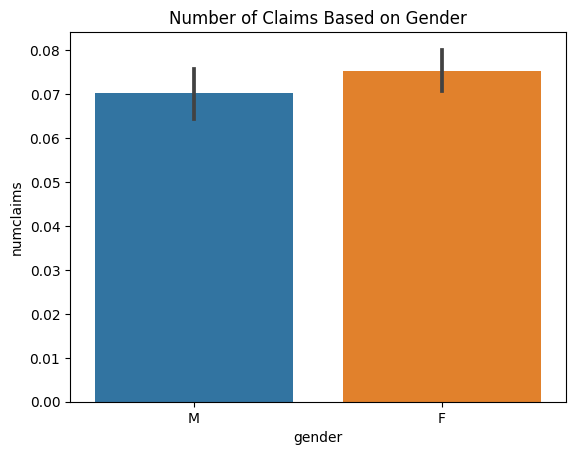

In [ ]:
sns.barplot(x = 'gender', y = 'numclaims', data = df_train)
plt.title('Number of Claims Based on Gender');

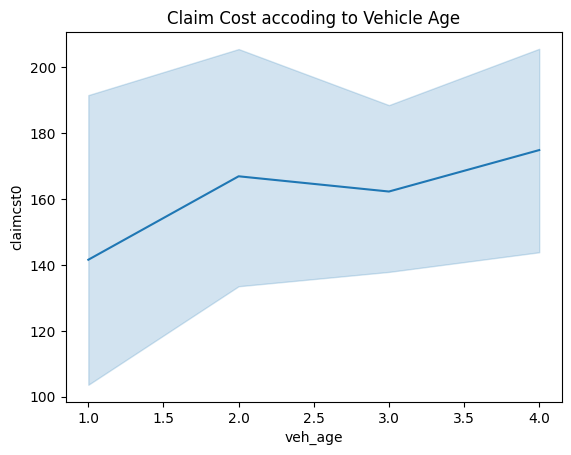

In [ ]:
sns.lineplot(x = 'veh_age', y='claimcst0', data = df_train)
plt.title('Claim Cost accoding to Vehicle Age');

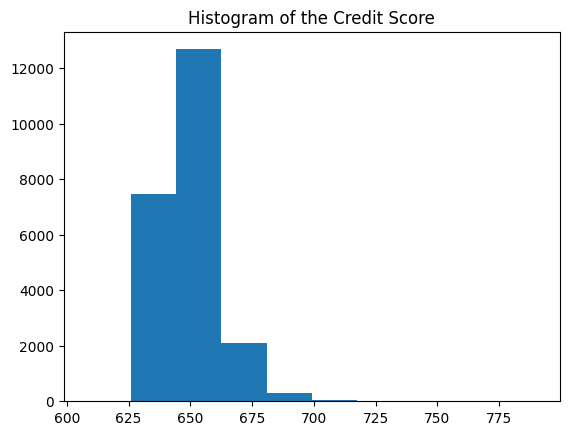

In [ ]:
plt.hist(x='credit_score', data = df_train)
plt.title('Histogram of the Credit Score');

# 6. Classification Models

In [ ]:
## Necessary Packages
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

#### Normalization & Pipeline Creation

In [ ]:
numeric_features = ['veh_value', 'exposure', 'max_power', 'driving_history_score', 'credit_score']
categorical_features = ['veh_body',"gender", "area","engine_type","veh_color","marital_status","time_of_week_driven","time_driven","trm_len"]
num_pipeline = Pipeline([
    ('scaler', StandardScaler()),

])

cat_pipeline = Pipeline([
    ('dummies', OneHotEncoder()),
])

prep_pipeline = ColumnTransformer([
    ('num', num_pipeline, numeric_features),
    ('cat', cat_pipeline, categorical_features)
])
prep_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['veh_value', 'exposure', 'max_power',
                                  'driving_history_score', 'credit_score']),
                                ('cat',
                                 Pipeline(steps=[('dummies', OneHotEncoder())]),
                                 ['veh_body', 'gender', 'area', 'engine_type',
                                  'veh_color', 'marital_status',
                                  'time_of_week_driven', 'time_driven',
                                  'trm_len'])])

### Classification Models

In [ ]:
!pip install xgboost

In [ ]:
## Necessary Packages
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
log_pipeline = Pipeline([
    ('preprocess', prep_pipeline),
    ('model', LogisticRegression(penalty = "l2", random_state = 17))
])

clf_pipeline = Pipeline([
    ('preprocess', prep_pipeline),
    ('model', DecisionTreeClassifier(random_state = 17))
])

knn_pipeline = Pipeline([
    ('preprocess', prep_pipeline),
    ('model', KNeighborsClassifier())
])

xgbc_pipeline = Pipeline([
    ('preprocess', prep_pipeline),
    ('model', XGBClassifier(random_state = 17))
])


rf_pipeline = Pipeline([
    ('preprocess', prep_pipeline),
    ('rf', RandomForestClassifier())
])

svm_pipeline = Pipeline([
    ('preprocess', prep_pipeline),
    ('svm', SVC(random_state = 17))
])

In [ ]:
df_train.head()

,id,veh_value,exposure,veh_body,veh_age,gender,area,agecat,engine_type,max_power,...,marital_status,e_bill,time_of_week_driven,time_driven,trm_len,credit_score,high_education_ind,clm,numclaims,claimcst0
0,1,0.77,0.444504,SEDAN,4,M,D,3,petrol,147,...,S,1,weekday,6pm - 12am,6,640.448137,1.0,0,0,0.0
1,2,4.45,0.562183,STNWG,1,M,A,3,petrol,158,...,S,1,weekday,6am - 12pm,12,683.749691,0.0,0,0,0.0
2,3,4.90,0.465244,STNWG,1,F,A,3,petrol,159,...,M,1,weekday,6pm - 12am,6,653.656117,1.0,0,0,0.0
3,4,0.48,0.271039,PANVN,4,M,A,4,petrol,80,...,S,1,weekday,12pm - 6pm,12,642.574671,0.0,0,0,0.0
4,5,0.85,0.141624,SEDAN,4,F,A,5,petrol,126,...,S,0,weekday,6am - 12pm,6,647.175035,0.0,0,0,0.0


**Creating a evaluation dataset to test the different models for the full dataset**

In [ ]:
## Spliting Training Dataset
X = df_train.drop(["clm","numclaims","claimcst0"], axis=1)
y = df_train['clm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Fine tuning Models

In [ ]:
## Necessary Packages
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**Calculating the optimal Regularization Strength for Logistic Regression**

In [ ]:
## Logistic Regression
param_grid = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 1000],
    'model__penalty': ['l1'],
    'model__solver': ['liblinear']
}

## Acquiring Accuracy Score
scorer = make_scorer(accuracy_score)

## Grid Search
grid_search = GridSearchCV(log_pipeline, param_grid, cv=5, scoring=scorer, error_score='raise')
grid_search.fit(X_train, y_train)

## Results
results_df = pd.DataFrame(grid_search.cv_results_)

print("Results for Different Values of C (Regularization Strength):")
for index, row in results_df.iterrows():
    c_value = row['param_model__C']
    accuracy = row['mean_test_score']
    print(f"C={c_value}, Accuracy: {accuracy:.20f}")

# Printing best parameters and corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(f"\nBest Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy:.8f}")

Results for Different Values of C (Regularization Strength):
C=0.001, Accuracy: 0.93230174081237904282
C=0.01, Accuracy: 0.93230174081237904282
C=0.1, Accuracy: 0.93230174081237904282
C=1, Accuracy: 0.93230174081237904282
C=10, Accuracy: 0.93230174081237904282
C=1000, Accuracy: 0.93230174081237904282

Best Parameters: {'model__C': 0.001, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Best Accuracy: 0.93230174


**Calculating the accruacy using a Random Forest Classifier**

In [ ]:
## Random Forest Classifier
param_grid = {
    'rf__n_estimators': [10,20],
    'rf__max_depth': [None, 8, 15, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

## Acquiring Accuracy Score
scorer = make_scorer(accuracy_score)

## Grid Search
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring=scorer, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_
print("Best Model:", best_model)

results_df = pd.DataFrame(grid_search.cv_results_)

# Printing the accuracy scores for each hyperparameter combination
print("\nAccuracy Scores for Each Hyperparameter Combination:")
for index, row in results_df.iterrows():
    params = {param: row[f'param_{param}'] for param in param_grid}
    accuracy = row['mean_test_score']
    print(f"Hyperparameters: {params}, Accuracy: {accuracy:.4f}")


Best Parameters: {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 10, 'rf__n_estimators': 20}
Best Model: Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['veh_value', 'exposure',
                                                   'max_power',
                                                   'driving_history_score',
                                                   'credit_score']),
                                                 ('cat',
                                                  Pipeline(steps=[('dummies',
                                                                   OneHotEncoder())]),
                                                  ['veh_body', 'gender', 'area',
                          

**Calculating the optimal number of K for KNN**

In [ ]:
## KNN
param_grid = {
    'model__n_neighbors': [1, 3, 5, 7, 9]
}

## Grid Search
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train, y_train)

results_df = pd.DataFrame(grid_search.cv_results_)

# Printing the different values for each K
print("Results for Different Values of K:")
for index, row in results_df.iterrows():
    k_value = row['param_model__n_neighbors']
    accuracy_score = row['mean_test_score']
    print(f"K={k_value}, Accuracy: {accuracy_score:.4f}")

best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(f"\nBest Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy:.8f}")


Results for Different Values of K:
K=1, Accuracy: 0.8757
K=3, Accuracy: 0.9201
K=5, Accuracy: 0.9289
K=7, Accuracy: 0.9316
K=9, Accuracy: 0.9320

Best Parameters: {'model__n_neighbors': 9}
Best Accuracy: 0.93202542


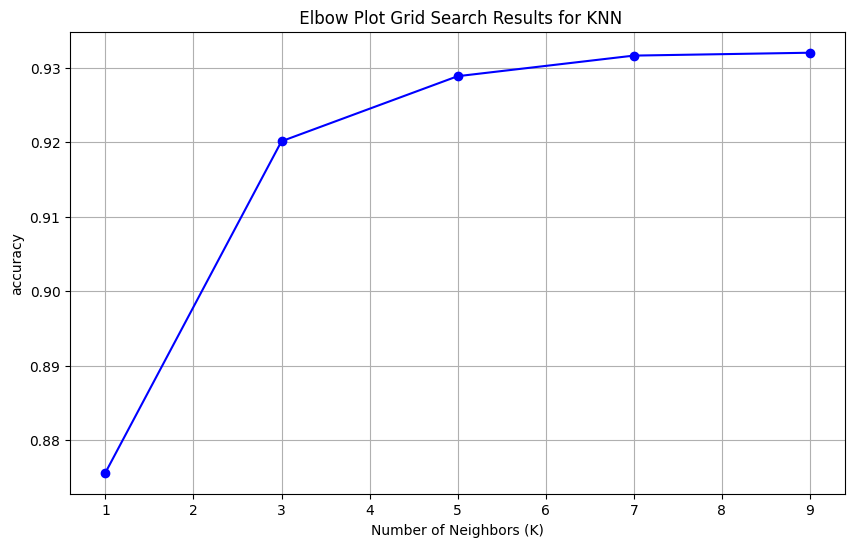

In [ ]:
# Plotting the Elbow Plot for KNN
plt.figure(figsize=(10, 6))
plt.errorbar(results_df['param_model__n_neighbors'], results_df['mean_test_score'], marker='o', linestyle='-', color='b')
plt.title(' Elbow Plot Grid Search Results for KNN')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('accuracy')
plt.grid(True)
plt.show()

**Calculating Accuracy for Decision Tree Classifier**

In [ ]:
## Decisiton Tree Classifier
param_grid = {
    'model__max_depth': [None, 8, 15, 20],
}

## Grid Search
grid_search = GridSearchCV(clf_pipeline, param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train, y_train)

results_df = pd.DataFrame(grid_search.cv_results_)

# Printing the different values for each alpha
print("Results for Different Values of Max Depth:")
for index, row in results_df.iterrows():
    max_depth = row['param_model__max_depth']

    accuracy_score = row['mean_test_score']

    print(f"Max_Depth = {max_depth}, accuracy: {accuracy_score:.4f}")

Results for Different Values of Max Depth:
Max_Depth = None, accuracy: 0.8639
Max_Depth = 8, accuracy: 0.9279
Max_Depth = 15, accuracy: 0.9038
Max_Depth = 20, accuracy: 0.8837


**Calculating Accuracy for XGBoost Classifier**

In [ ]:
## XGBoosting Classifier
param_grid = {
    'model__max_depth': [2, 4, 6, 8, 10],
    'model__n_estimators': [100, 200, 300, 400],
    'model__min_child_weight': [1, 2, 3, 4, 5]
}


## Grid Search
grid_search = GridSearchCV(xgbc_pipeline, param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train, y_train)

results_df = pd.DataFrame(grid_search.cv_results_)


# Printing the best parameters accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(f"\nBest Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy:.4f}")

print("Results for Different Values of Hyperparameters:")
for index, row in results_df.iterrows():
    max_depth = row['param_model__max_depth']
    n_estimators = row['param_model__n_estimators']
    min_child_weight = row['param_model__min_child_weight']
    accuracy_score = row['mean_test_score']

    print(f"Max_Depth = {max_depth}, N_estimators = {n_estimators}, Min_Child_Weight = {min_child_weight}, Accuracy: {accuracy_score:.4f}")



Best Parameters: {'model__max_depth': 2, 'model__min_child_weight': 1, 'model__n_estimators': 100}
Best Accuracy: 0.9323
Results for Different Values of Hyperparameters:
Max_Depth = 2, N_estimators = 100, Min_Child_Weight = 1, Accuracy: 0.9323
Max_Depth = 2, N_estimators = 200, Min_Child_Weight = 1, Accuracy: 0.9323
Max_Depth = 2, N_estimators = 300, Min_Child_Weight = 1, Accuracy: 0.9322
Max_Depth = 2, N_estimators = 400, Min_Child_Weight = 1, Accuracy: 0.9322
Max_Depth = 2, N_estimators = 100, Min_Child_Weight = 2, Accuracy: 0.9323
Max_Depth = 2, N_estimators = 200, Min_Child_Weight = 2, Accuracy: 0.9323
Max_Depth = 2, N_estimators = 300, Min_Child_Weight = 2, Accuracy: 0.9323
Max_Depth = 2, N_estimators = 400, Min_Child_Weight = 2, Accuracy: 0.9323
Max_Depth = 2, N_estimators = 100, Min_Child_Weight = 3, Accuracy: 0.9323
Max_Depth = 2, N_estimators = 200, Min_Child_Weight = 3, Accuracy: 0.9323
Max_Depth = 2, N_estimators = 300, Min_Child_Weight = 3, Accuracy: 0.9323
Max_Depth = 2, 

**Evaluating the SVM Model**

In [ ]:
## SVM
param_grid = {
    'svm__C':[0.001, 0.01, 0.1, 1, 10, 1000],
    'svm__kernel':['sigmoid','rbf'],
    'svm__gamma': ['auto']
}


## Grid Search
grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train, y_train)

results_df = pd.DataFrame(grid_search.cv_results_)


# Print the best parameters accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(f"\nBest Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy:.4f}")

# Printing the different values for each combination of parameters
print("Results for Different Values of Hyperparameters:")
for index, row in results_df.iterrows():
    C = row['param_svm__C']
    kernel = row['param_svm__kernel']
    gamma = row['param_svm__gamma']
    accuracy_score = row['mean_test_score']

    print(f"C = {C}, kernel = {kernel}, gamma = {gamma}, Accuracy: {accuracy_score:.4f}")



Best Parameters: {'svm__C': 0.001, 'svm__gamma': 'auto', 'svm__kernel': 'sigmoid'}
Best Accuracy: 0.9323
Results for Different Values of Hyperparameters:
C = 0.001, kernel = sigmoid, gamma = auto, Accuracy: 0.9323
C = 0.001, kernel = rbf, gamma = auto, Accuracy: 0.9323
C = 0.01, kernel = sigmoid, gamma = auto, Accuracy: 0.9322
C = 0.01, kernel = rbf, gamma = auto, Accuracy: 0.9323
C = 0.1, kernel = sigmoid, gamma = auto, Accuracy: 0.9305
C = 0.1, kernel = rbf, gamma = auto, Accuracy: 0.9323
C = 1, kernel = sigmoid, gamma = auto, Accuracy: 0.9243
C = 1, kernel = rbf, gamma = auto, Accuracy: 0.9323
C = 10, kernel = sigmoid, gamma = auto, Accuracy: 0.8943
C = 10, kernel = rbf, gamma = auto, Accuracy: 0.9323
C = 1000, kernel = sigmoid, gamma = auto, Accuracy: 0.8726
C = 1000, kernel = rbf, gamma = auto, Accuracy: 0.9148


## Model Performance Comparisons

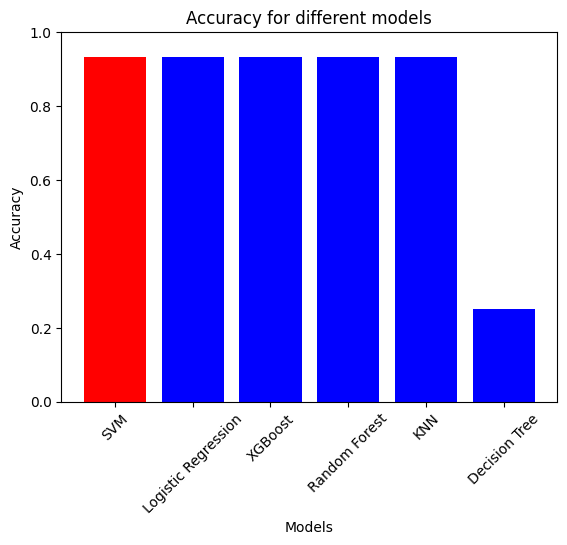

In [ ]:
## Plotting the Performance of Each Model
accuracy_dict = {'SVM': 0.9323, 'Logistic Regression': 0.9323, 'XGBoost': 0.9323, "Random Forest": 0.9323, 'KNN': 0.9320, 'Decision Tree': 0.2512}


models = list(accuracy_dict.keys())
accuracies = list(accuracy_dict.values())

max_index = accuracies.index(max(accuracies))
colors = ['blue' if i != max_index else 'red' for i in range(len(models))]
plt.bar(models, accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy for different models')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()


Based off SVM having the highest preformance and being a simplier model than the XGBoost and Random Forest, we decided to choose SVM as our optimal model.

### Calculating the Accuracy for SVM

In [ ]:
best_svm = svm_pipeline.fit(X_train, y_train)

svm_y_pred = best_svm.predict(X_test)

test_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"Test Accuracy: {test_accuracy:.8f}")

Test Accuracy: 0.92992927


# 8. Limitations

- Our objective was to develop a predictive algorithm that would enable us to estimate the claim amount accurately. However, we encountered a significant challenge in the form of extremely high RMSE scores, which hindered our progress. Upon investigation, we realized that the issue was caused by the fact that some clients did not submit claims while others submitted large ones. As a result, this made it difficult for our predictive algorithm to perform at the desired level of accuracy. After obtaining a comprehensive understanding of our dataset, we decided to shift our focus and create a classification model that allowed us to complete the project's aims successfully.

# 9. Conclusion

- After conducting a thorough analysis, we found that all of our different classification models performed similarly. However, we ultimately chose to implement the Support Vector Machine model as it was our preferred choice. The reasoning behind this decision was based on its high accuracy rate, ability to handle complex data sets, and simplicity.

    Due to the fact that our dataset was smaller than anticipated, we opted for the Grid Search technique for Hyperparameter tuning. This method allowed us to successfully find the best hyperparameters without having to rely on random search.

    In the future, we aim to incorporate Neural Networks in our project to make it more comprehensive. This would allow us to further improve the accuracy of our model and provide better predictions. With these enhancements, the project will be more attractive to insurance companies who are looking for effective ways to classify and differentiate between customers who would submit a claim.

    Finally, our optimal model achieved an accuracy rate of 92.99%, which means it can accurately predict whether a client is likely to submit a claim. This level of accuracy is significant because it can provide insurance companies with valuable insights into their customers' behavior, allowing them to make informed decisions about their policies and better manage their risk.

# 10. References

- “Insurance Fraud Costs the U.S. $308 Billion Annually.” ConroySimberg, www.conroysimberg.com/blog/insurance-fraud-costs-the-u-s-308-billion-annually/. Accessed 15 Jan. 2024.